<a href="https://colab.research.google.com/github/kailee0422/Machine-Learning/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

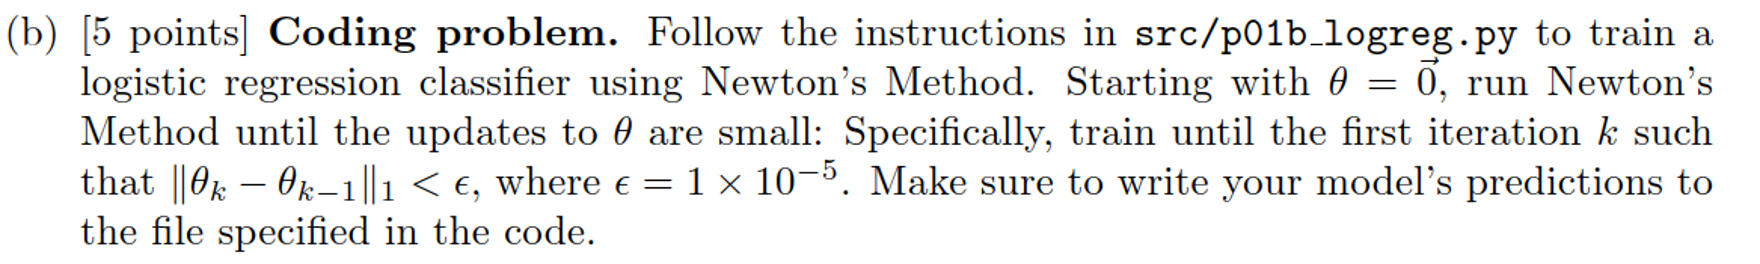

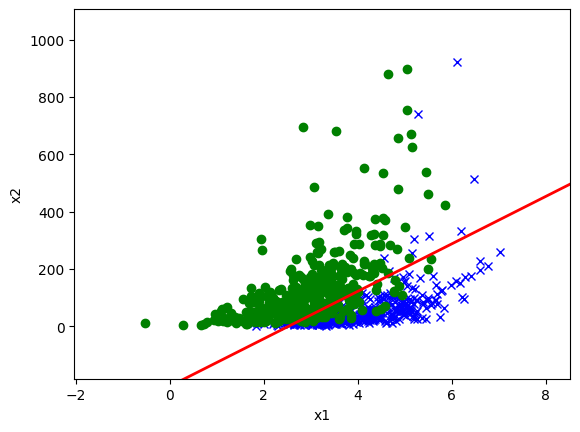

In [10]:
import numpy as np
import os
import util
from linear_model import LinearModel

def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Create output directory if it doesn't exist
    output_dir = os.path.dirname('output/')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Load training dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # Initialize and train the logistic regression model using Newton's Method
    model = LogisticRegression(eps=1e-5)  # epsilon value for convergence
    model.fit(x_train, y_train)

    # Plot data and decision boundary
    util.plot(x_train, y_train, model.theta, 'output/p01b_{}.png'.format(pred_path[-5]))

    # Load evaluation dataset
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)

    # Predict and save predictions
    y_pred = model.predict(x_eval)
    np.savetxt(pred_path, y_pred > 0.5, fmt='%d')


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver."""

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # Initialize theta (weights)
        m, n = x.shape
        self.theta = np.zeros(n)

        while True:
            # Compute the hypothesis (sigmoid function)
            h_x = 1 / (1 + np.exp(-x.dot(self.theta)))

            # Compute the gradient of the cost function (first derivative)
            gradient = x.T.dot(h_x - y) / m

            # Compute the Hessian matrix (second derivative)
            H = (x.T * h_x * (1 - h_x)).dot(x) / m

            # Save the current value of theta
            theta_old = np.copy(self.theta)

            # Update theta using Newton's update rule
            self.theta -= np.linalg.inv(H).dot(gradient)

            # Check for convergence: Stop if the change in theta is less than epsilon
            if np.linalg.norm(self.theta - theta_old, ord=1) < self.eps:
                break

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        return 1 / (1 + np.exp(-x.dot(self.theta)))


# Run the main function with provided dataset paths
main('ds1_train.csv', 'ds1_valid.csv', 'predictions.txt')